### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Load the Dataset

In [2]:
df = pd.read_csv('banknotes.csv')
df.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [3]:
df.shape

(1372, 5)

In [4]:
df['Class'].value_counts() # 0 for fake note, 1 for real note

0    762
1    610
Name: Class, dtype: int64

<Axes: xlabel='Variance', ylabel='Density'>

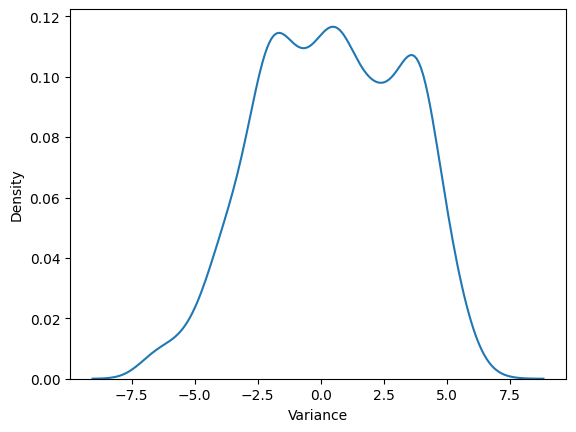

In [5]:
sns.kdeplot(df['Variance'])

<Axes: xlabel='Skewness', ylabel='Density'>

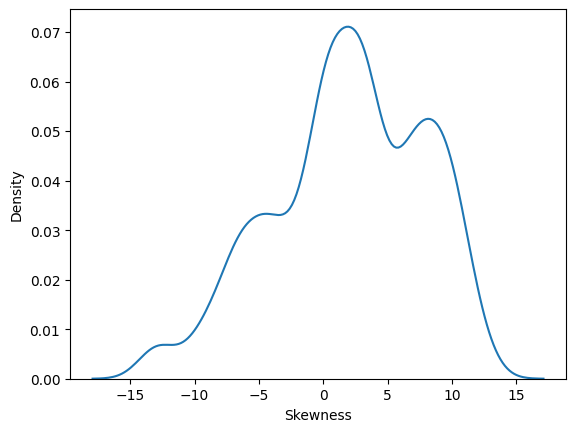

In [6]:
sns.kdeplot(df['Skewness'])

### Seperating the Input & Output Variables

In [7]:
X = df.drop('Class', axis=1)
y = df.Class

In [8]:
X.shape

(1372, 4)

In [9]:
y.shape

(1372,)

### Explore the Data

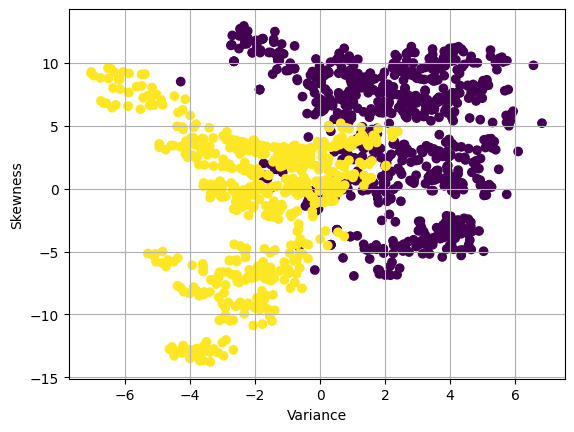

In [10]:
plt.xlabel('Variance')
plt.ylabel('Skewness')
plt.grid()
plt.scatter(df.Variance, df.Skewness, c = y) # Color

<Axes: xlabel='Variance', ylabel='Skewness'>

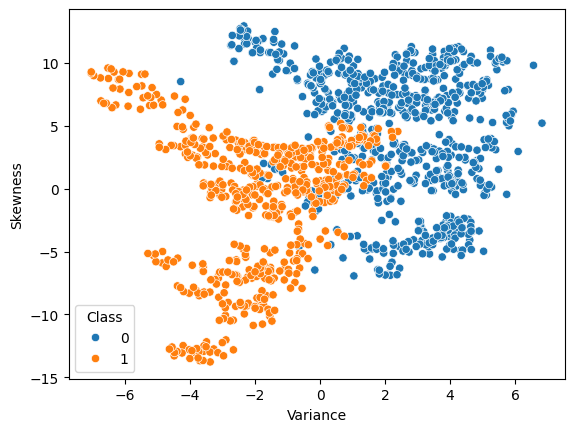

In [11]:
sns.scatterplot(df, x=df.Variance, y=df.Skewness, hue=df.Class)

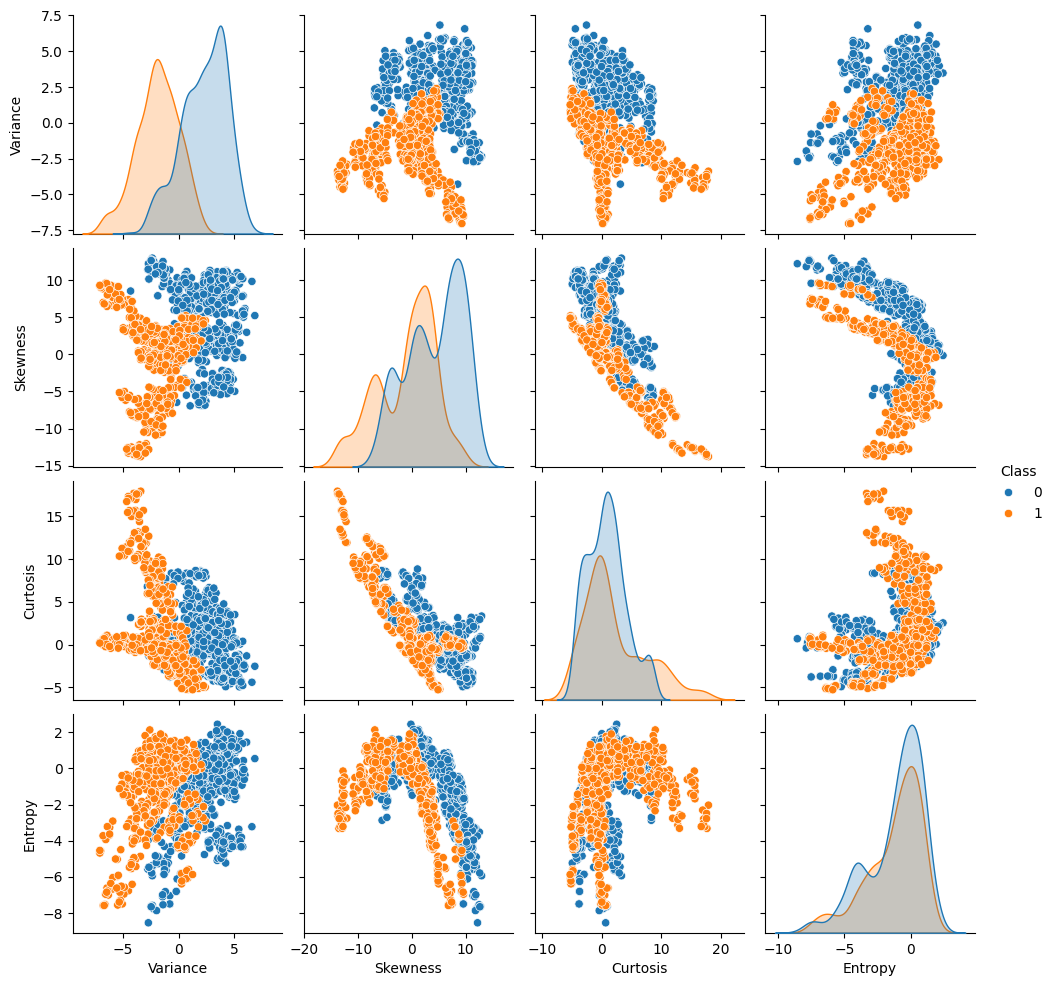

In [12]:
sns.pairplot(df, hue='Class')

([<matplotlib.patches.Wedge at 0x1ca3a81d7d0>,
 [Text(-0.19046171571266454, 1.0833855891822581, '0'),
  Text(0.19046171571266443, -1.0833855891822581, '1')],
 [Text(-0.10388820857054429, 0.5909375940994134, '55.54%'),
  Text(0.10388820857054422, -0.5909375940994134, '44.46%')])

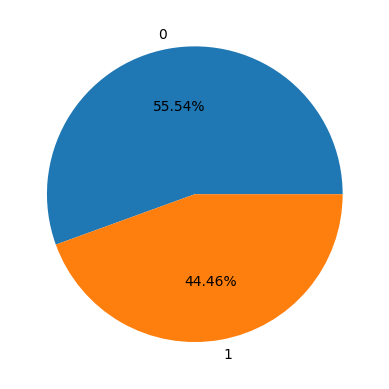

In [13]:
plt.pie(y.value_counts(), labels=y.value_counts().index, autopct='%2.2f%%')

In [14]:
df.describe()

,Variance,Skewness,Curtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


### Cross Validation

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

In [17]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1029, 4), (343, 4), (1029,), (343,))

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
dt = DecisionTreeClassifier(random_state=0)

In [20]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [21]:
y_pred = dt.predict(X_test)
y_pred

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,

Accuracy Score:  0.9795918367346939

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       195
           1       0.97      0.98      0.98       148

    accuracy                           0.98       343
   macro avg       0.98      0.98      0.98       343
weighted avg       0.98      0.98      0.98       343



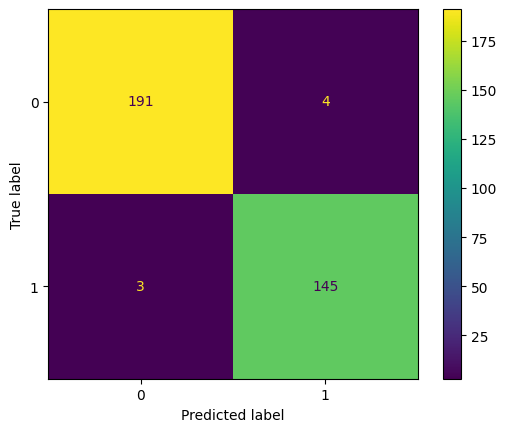

In [22]:
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

print('Accuracy Score: ',accuracy_score(y_test, y_pred))

print('\nClassification Report: \n',classification_report(y_test, y_pred))

print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

<BarContainer object of 4 artists>

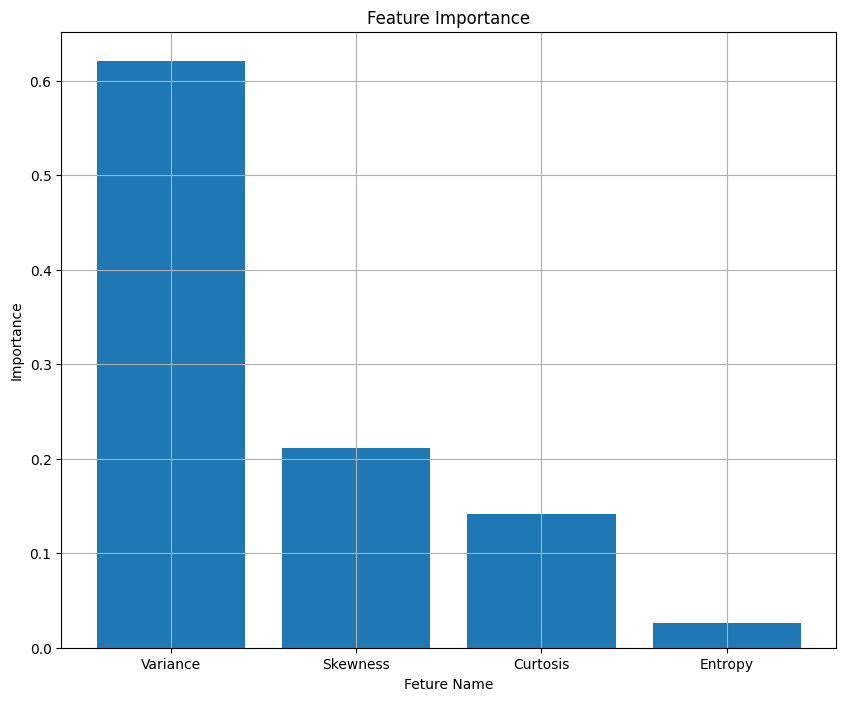

In [23]:
plt.figure(figsize=(10,8))
plt.title('Feature Importance')
plt.xlabel('Feture Name')
plt.ylabel('Importance')
plt.grid()
plt.bar(X.columns, dt.feature_importances_)

In [24]:
print(dt.feature_importances_)

[0.62095248 0.21106862 0.14189251 0.02608639]


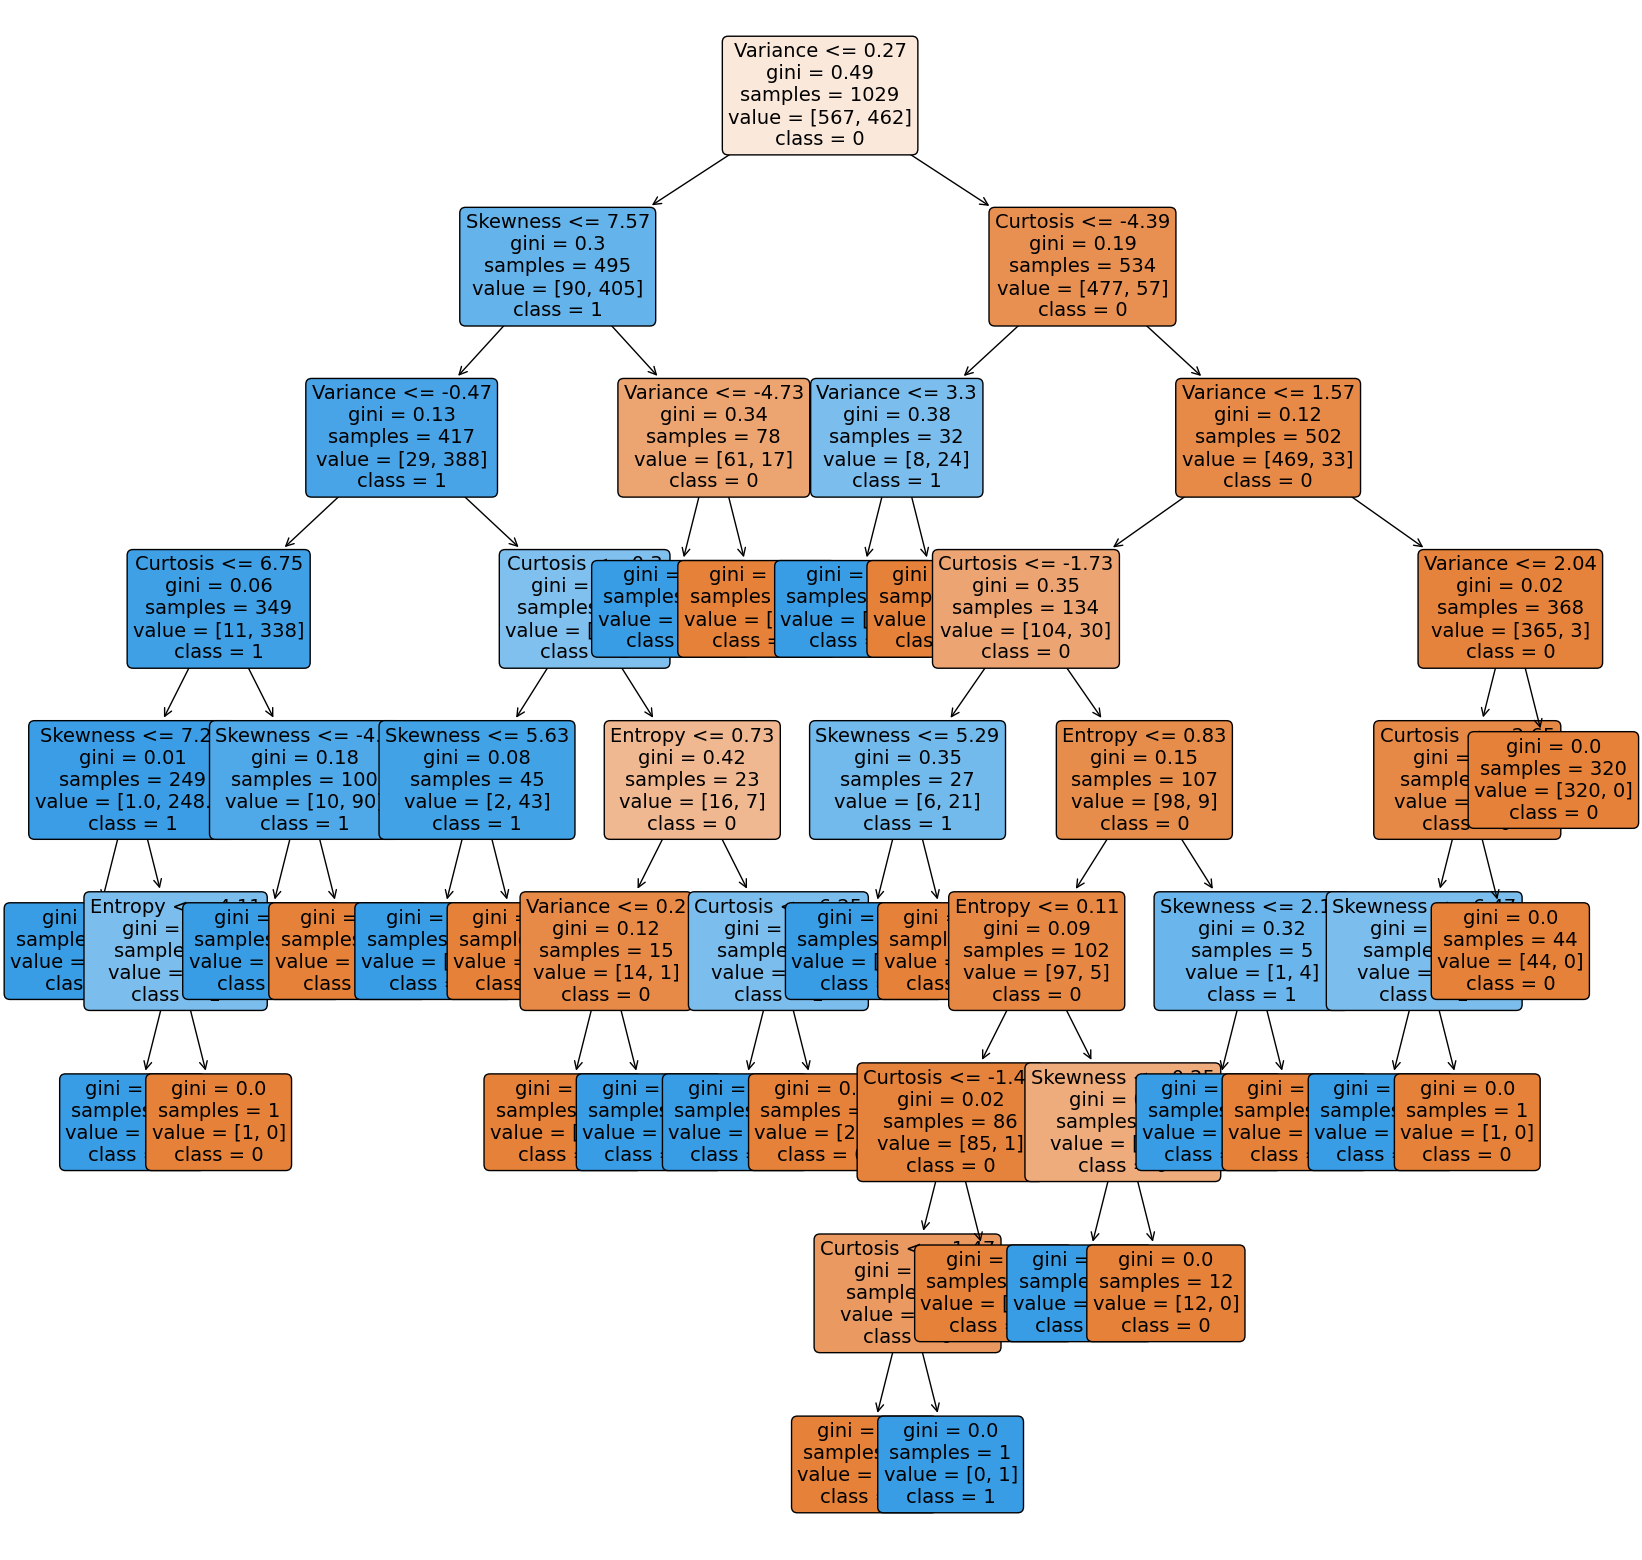

In [25]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,20))

plot_tree(dt, feature_names=X.columns, class_names=['0','1'], filled=True, fontsize=14, rounded=True, precision=2)
plt.show() 

In [26]:
new = pd.DataFrame([[0.40614, 1.34920, -1.4501, -0.55949],
                    [3.45660, 9.52280, -4.0112, -3.59440],
                    [4.5459, 8.1674, -2.4586, -1.46210]], columns=X.columns)
new

,Variance,Skewness,Curtosis,Entropy
0,0.40614,1.3492,-1.4501,-0.55949
1,3.45660,9.5228,-4.0112,-3.59440
2,4.54590,8.1674,-2.4586,-1.46210


In [27]:
y_pred = dt.predict(new)

In [28]:
y_pred

array([1, 0, 0], dtype=int64)

Accuracy Score:  0.9941690962099126

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       195
           1       0.99      1.00      0.99       148

    accuracy                           0.99       343
   macro avg       0.99      0.99      0.99       343
weighted avg       0.99      0.99      0.99       343



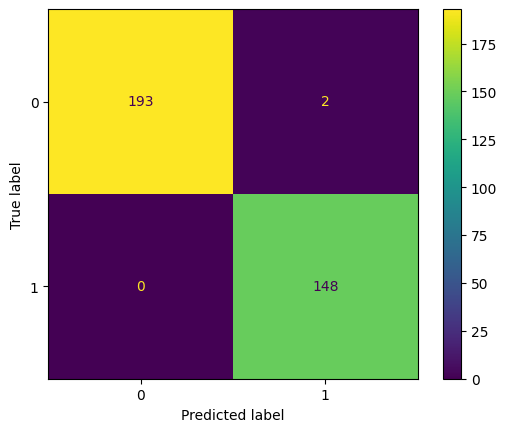

In [29]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10, random_state=0)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print('Accuracy Score: ',accuracy_score(y_test, y_pred))

print('\nClassification Report: \n',classification_report(y_test, y_pred))

print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

In [30]:
y_pred = rf.predict(new)
y_pred

array([1, 0, 0], dtype=int64)